# Funcion de correlacion disco R=5D

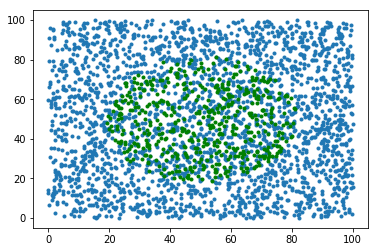

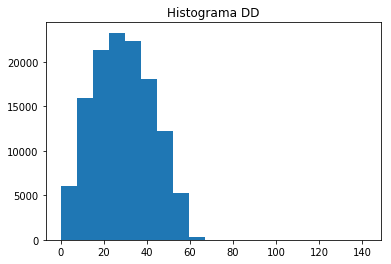

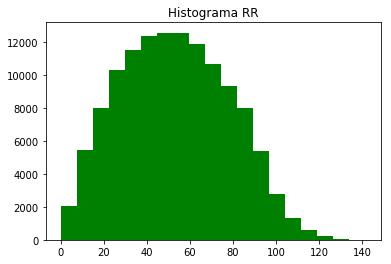

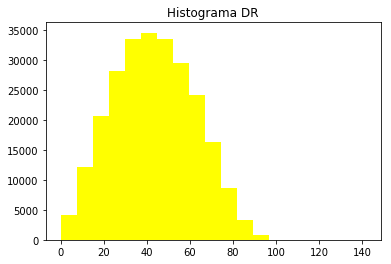

C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in divide


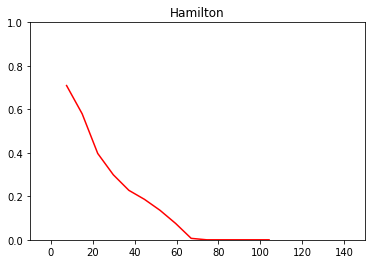

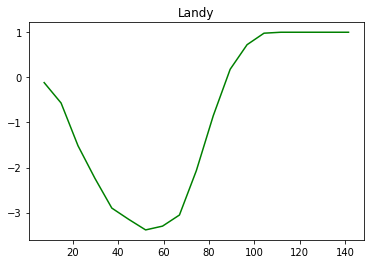

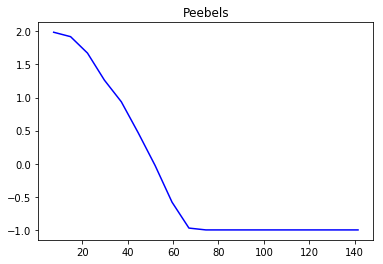

C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in divide


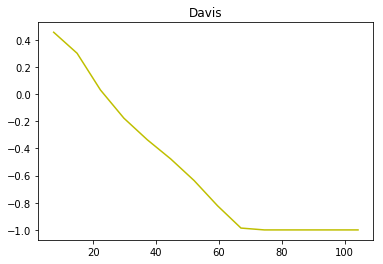

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline 

#Formando el disco 
theta = np.random.random(500)*2.*np.pi # para datos D=500
r1 = np.random.uniform(0.0,1000.,500) # para datos D=500
r = np.sqrt(r1)
x = r*np.cos(theta) + 50.
y = r*np.sin(theta) + 50.

#Formando el rectangulo lado l
l = 100
recx = l*np.random.uniform(0.,1.,2500) #Aleatorios 5 veces D, 2500
recy = l*np.random.uniform(0.,1.,2500) #Aleatorios 5 veces D, 2500

#grafica puntos disco y rectangulo
plt.plot(recx,recy,'.')
plt.plot(x,y,'.',color='green')
plt.show()

#distancia entre puntos 2D
def distancia(x1,x2,y1,y2):
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d
#guardando dist.
dato = []
ran = []
for i in range(len(x)):
    for j in range(i+1,len(x)):
        dd = distancia(x[i],x[j],y[i],y[j])
        dr = distancia(recx[i],recx[j],recy[i],recy[j])
        dato.append(dd)
        ran.append(dr)
nbin = np.linspace(0.,np.sqrt(2.)*l,20) #numero de bins
#print nbin        
#histograma datos DD
daton, datobin,m = plt.hist(dato,bins=nbin)
plt.title('Histograma DD')
plt.show()
#histograma aleatorios RR
randn, randbin, p = plt.hist(ran,bins=nbin, color='green')
plt.title('Histograma RR')
plt.show()

dr = []
for i in range(len(x)):
    for j in range(len(x)):
        ddr = distancia(x[i],recx[j],y[i],recy[j])
        dr.append(ddr)

#Histograma DR
drn, drbin, q = plt.hist(dr,bins=nbin, color='yellow')
plt.title('Histograma DR')
plt.show()

#Para formar estimadores
DD=daton
RR=randn
DR=drn


#Fun. de correlacion
#Hamilton
plt.plot(datobin[1:], (DD*RR)/(DR)**2  ,'r')
plt.title('Hamilton')
plt.axis([-10, 150, 0, 1])
plt.show()

#Landy 
plt.plot(datobin[1:],1.+ DD/RR -2*DR/RR,'g')
plt.title('Landy')
plt.show()

#Peebels
plt.plot(datobin[1:], DD/RR - 1. ,'b')
plt.title('Peebels')
plt.show()

#Davis
plt.plot(datobin[1:], (DD)/(DR) -1.  ,'y')
plt.title('Davis')
plt.show()
